<a href="https://colab.research.google.com/github/Chandan062311/CarPrice/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

class CarPricePrediction:
    def __init__(self, filename):
        self.data = pd.read_csv(filename)

    def display_data_info(self):
        # Display basic info about the dataset
        print("Shape of the dataset:", self.data.shape)
        print("\nColumn names:")
        print(self.data.columns)
        print("\nData types:")
        print(self.data.dtypes)
        print("\nSummary statistics:")
        print(self.data.describe())

# Create an instance of CarPricePrediction
car_price_prediction = CarPricePrediction("/content/CarPrice_Assignment.csv")

# Display information about the dataset
car_price_prediction.display_data_info()


Shape of the dataset: (205, 26)

Column names:
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Data types:
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64

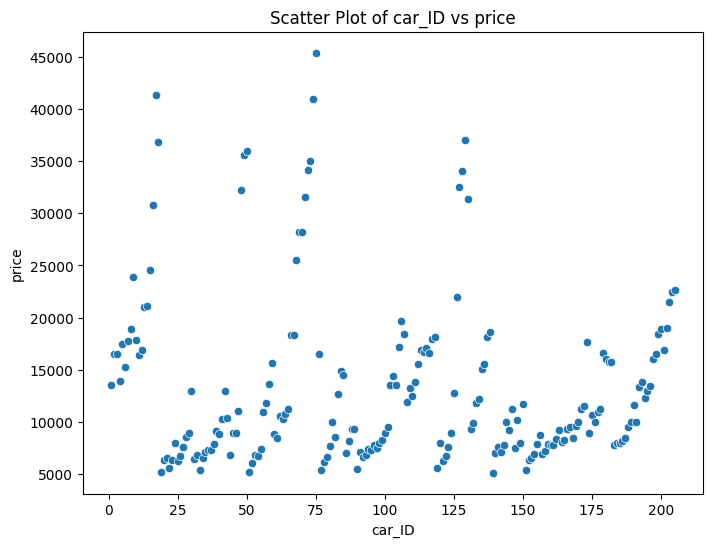

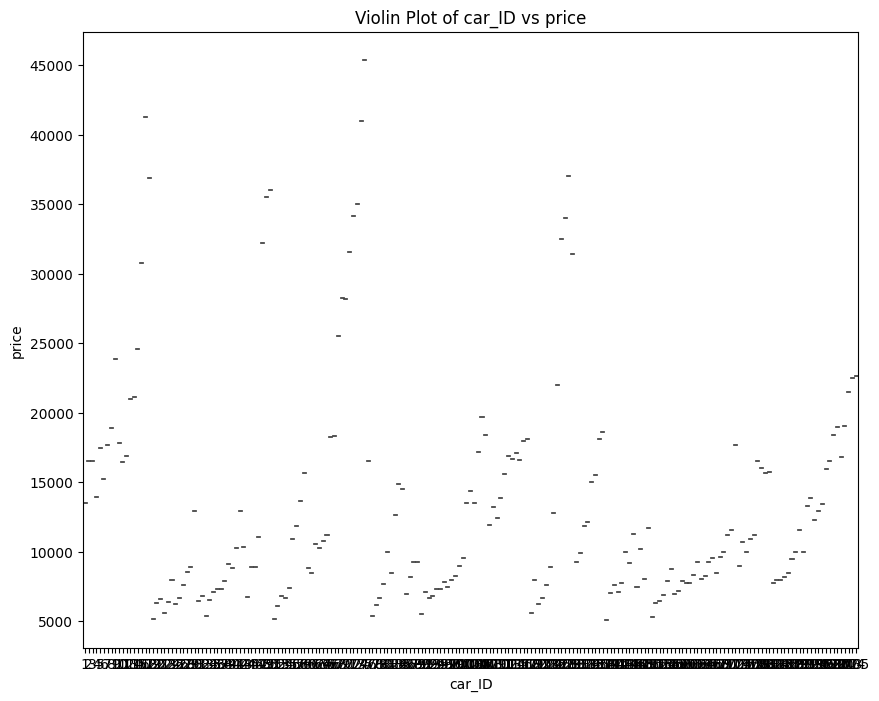

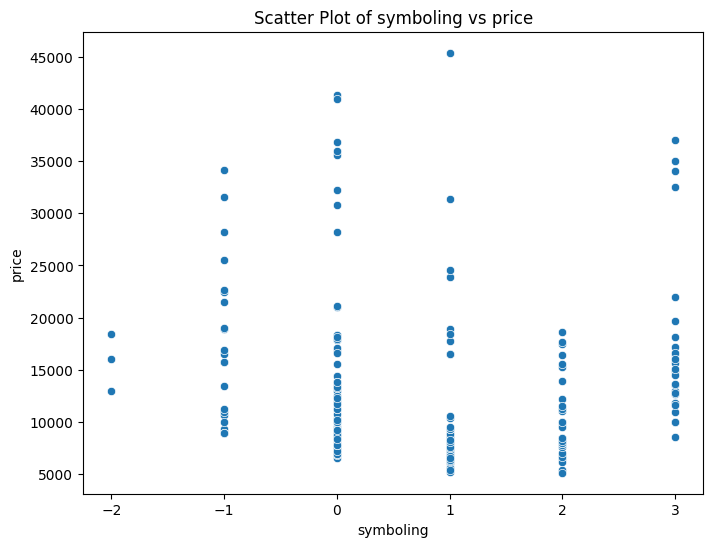

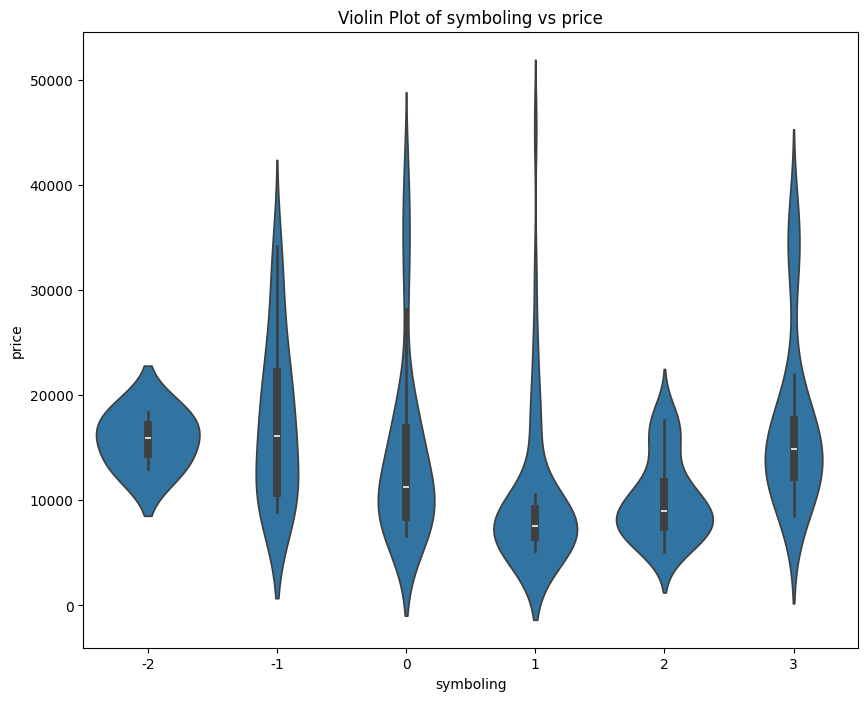

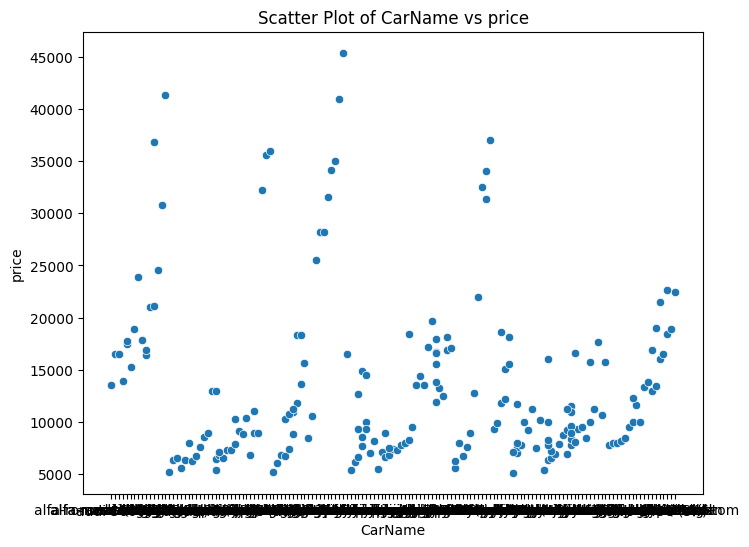

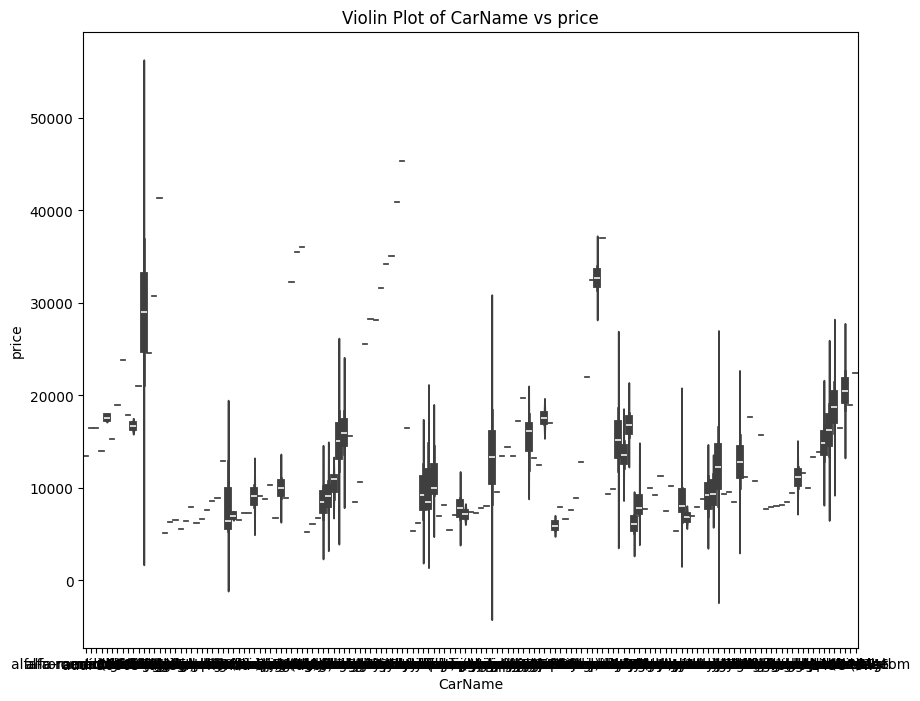

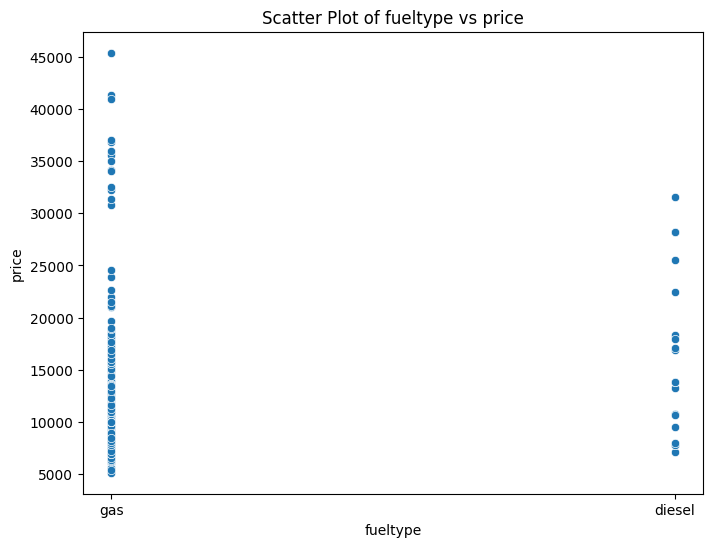

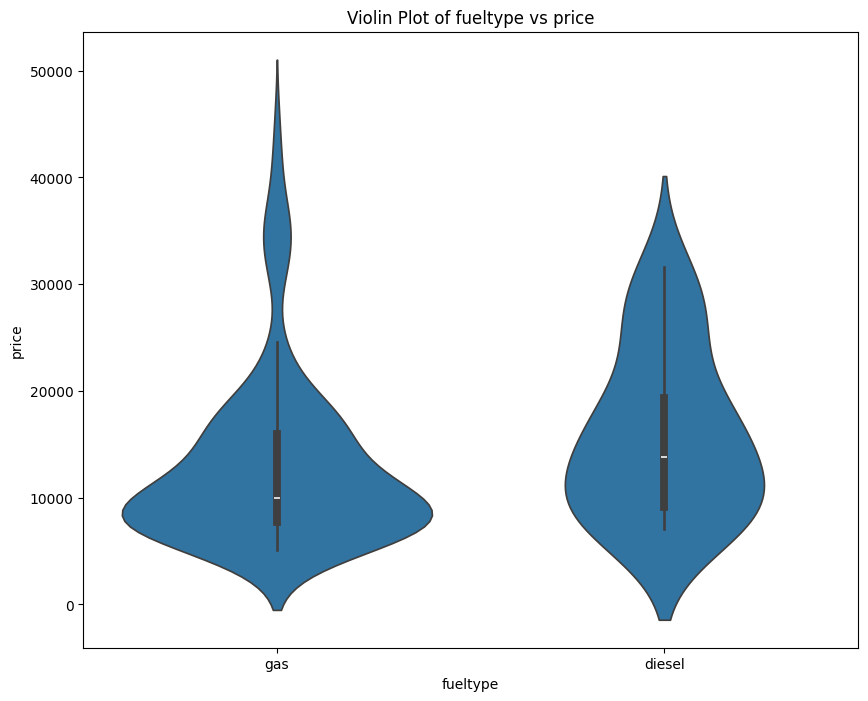

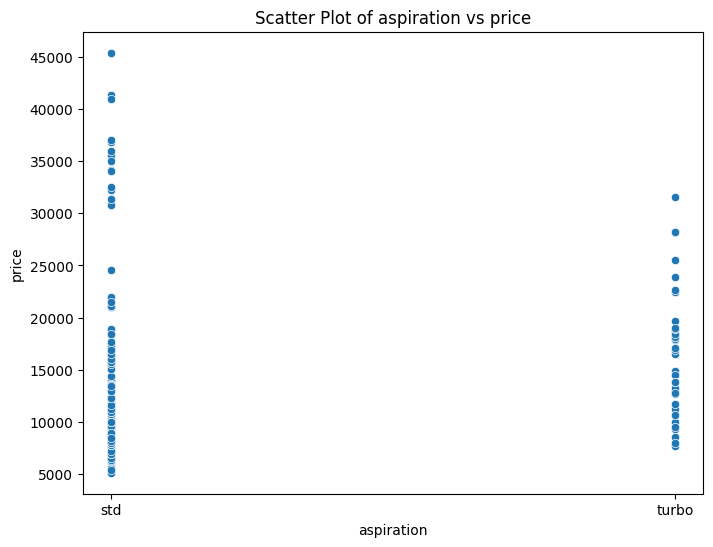

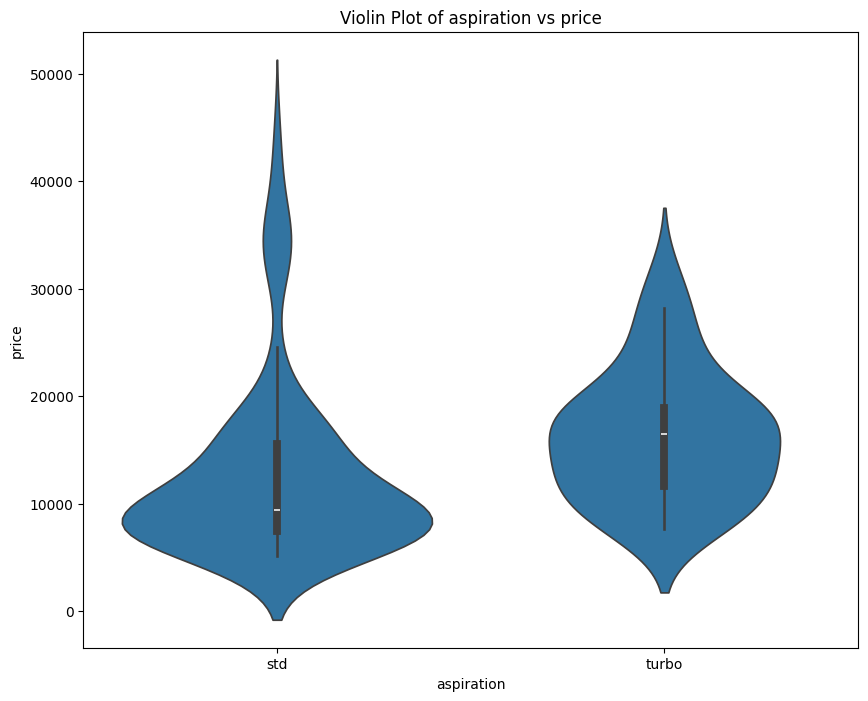

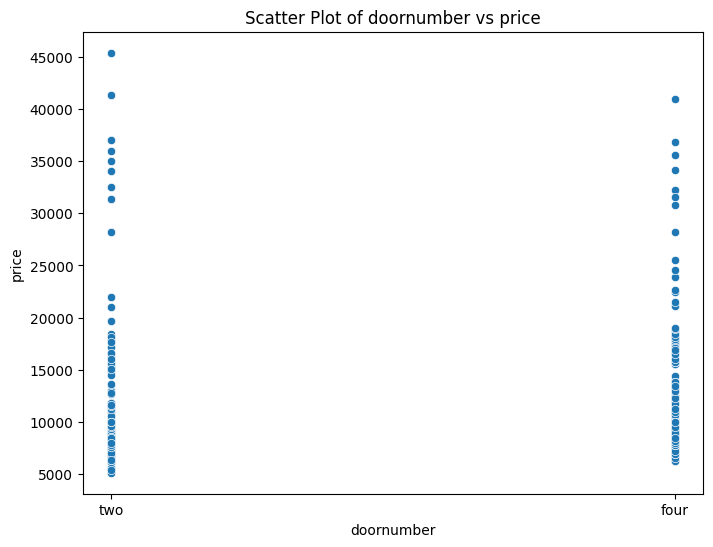

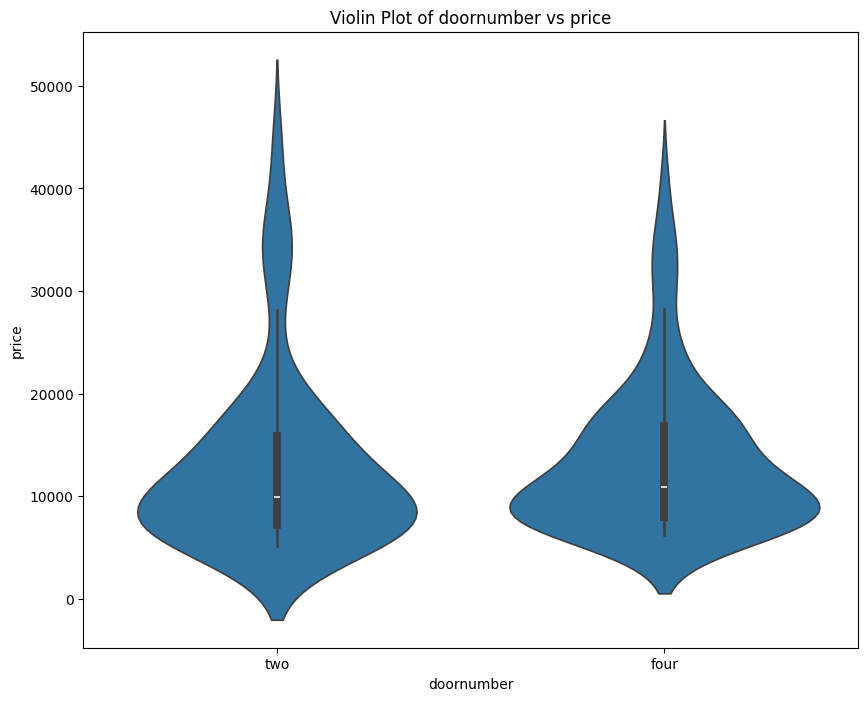

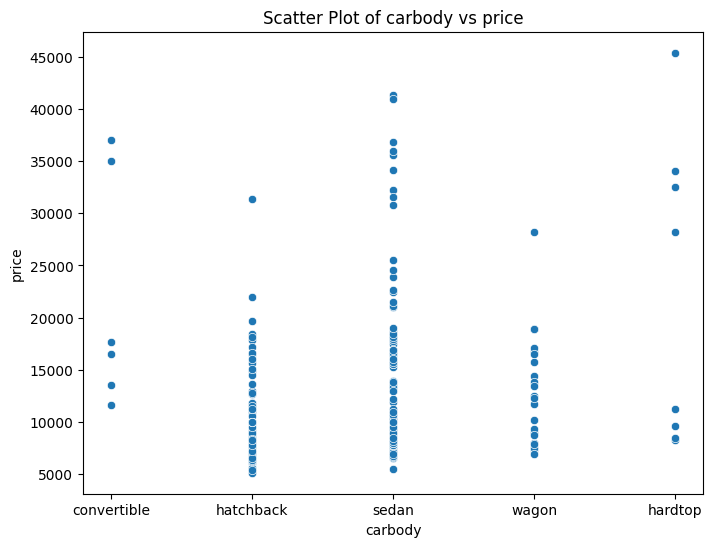

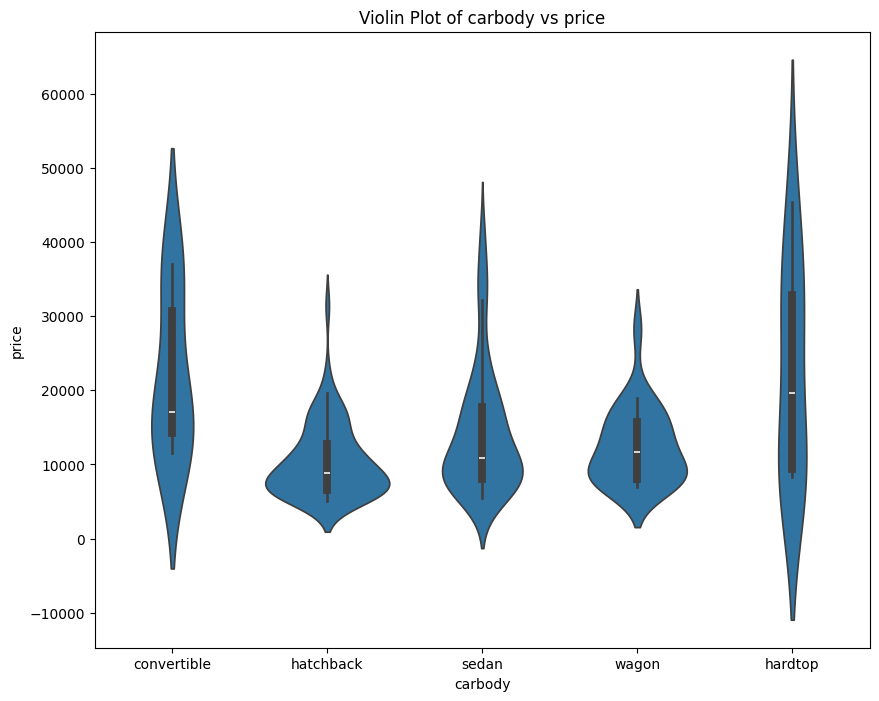

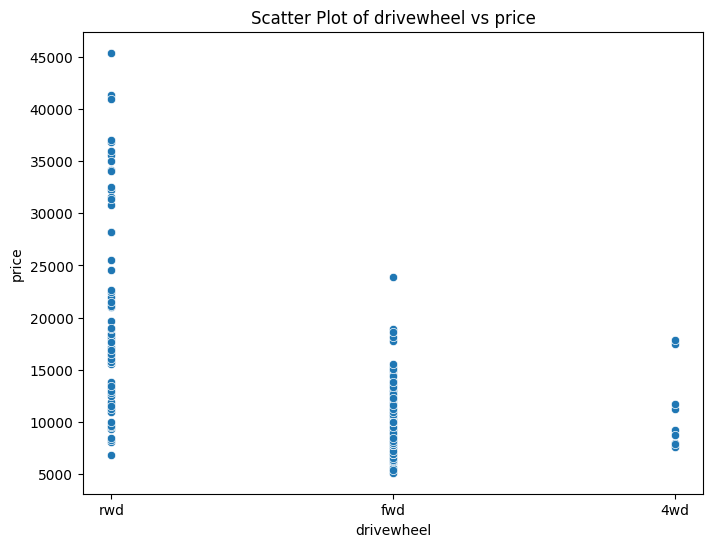

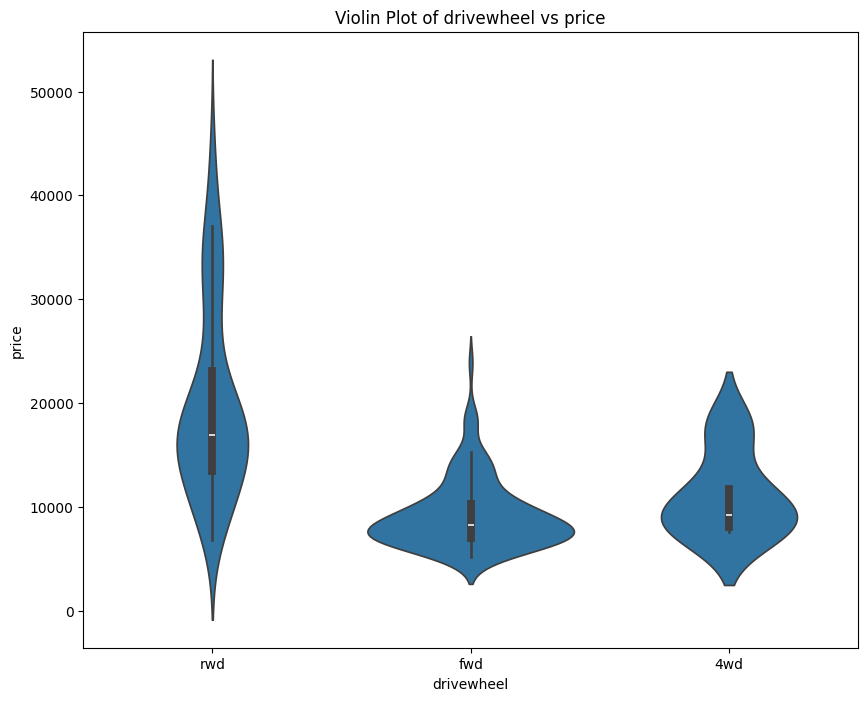

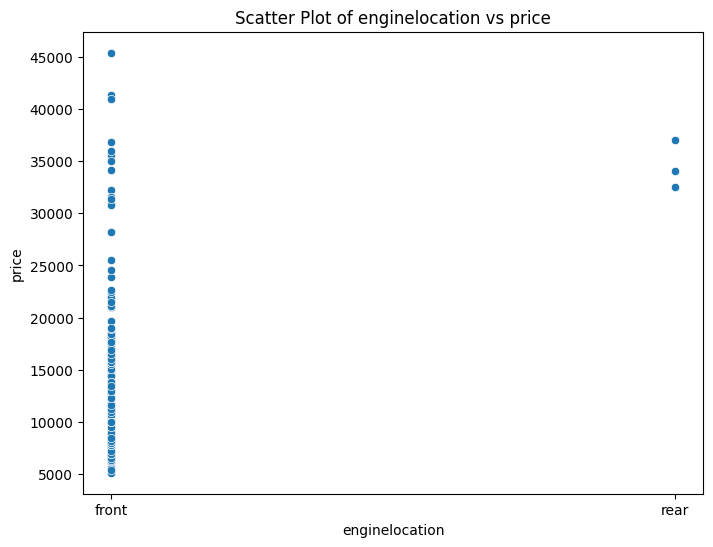

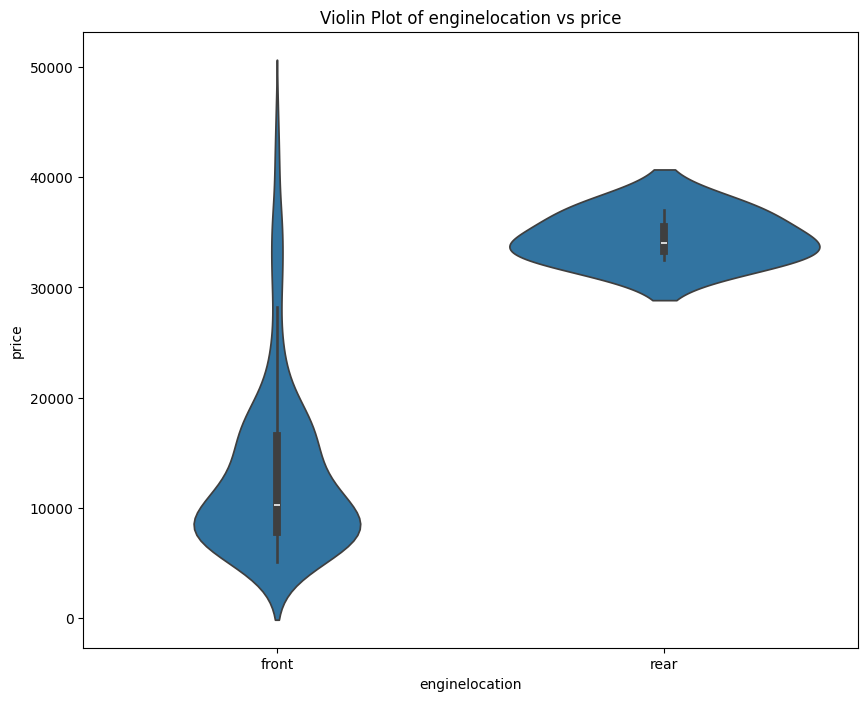

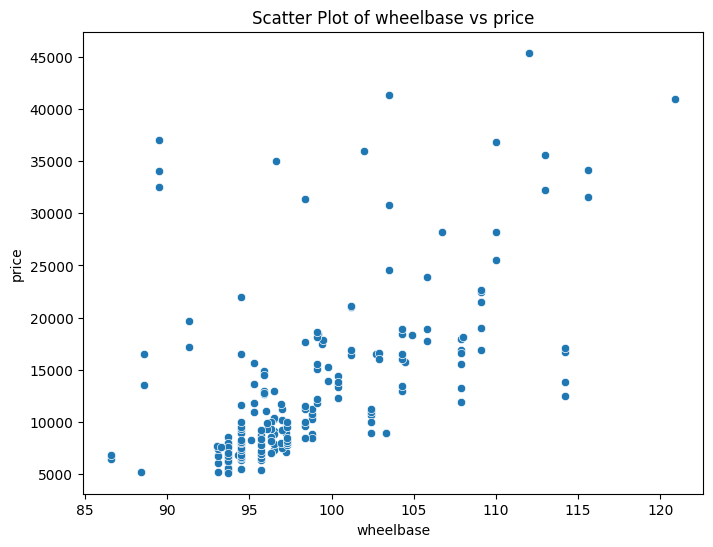

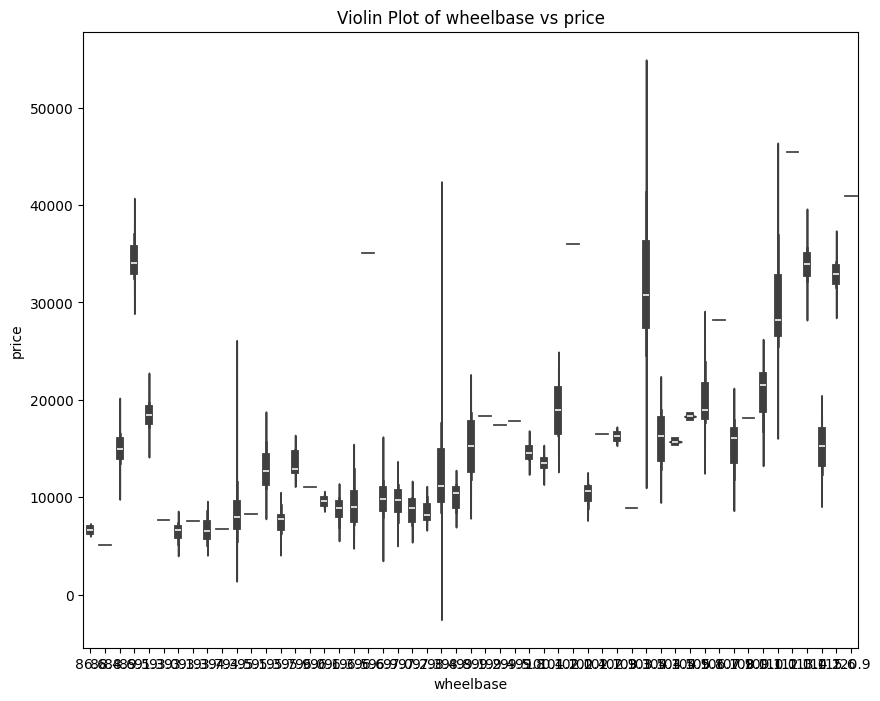

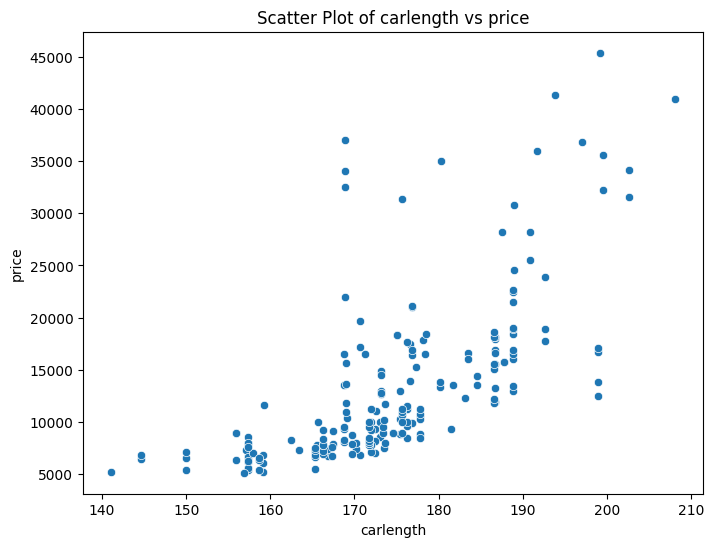

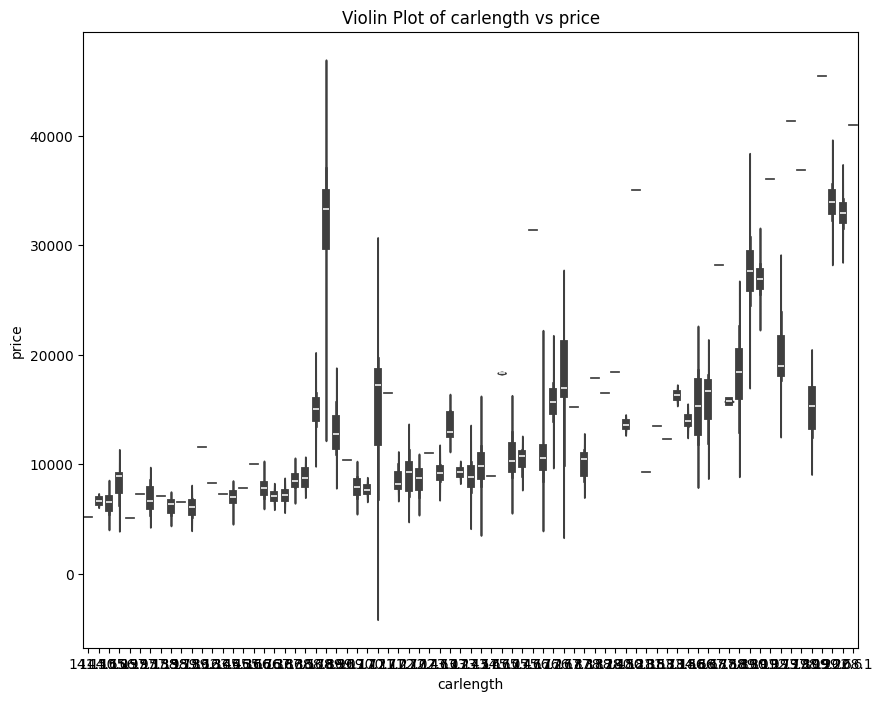

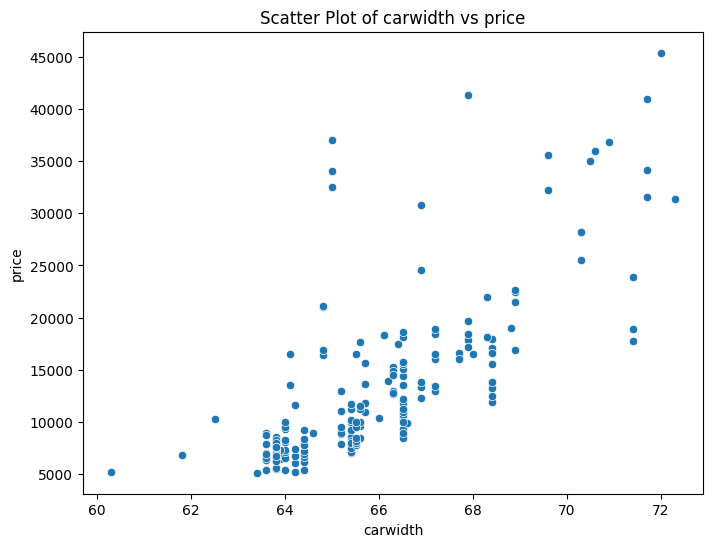

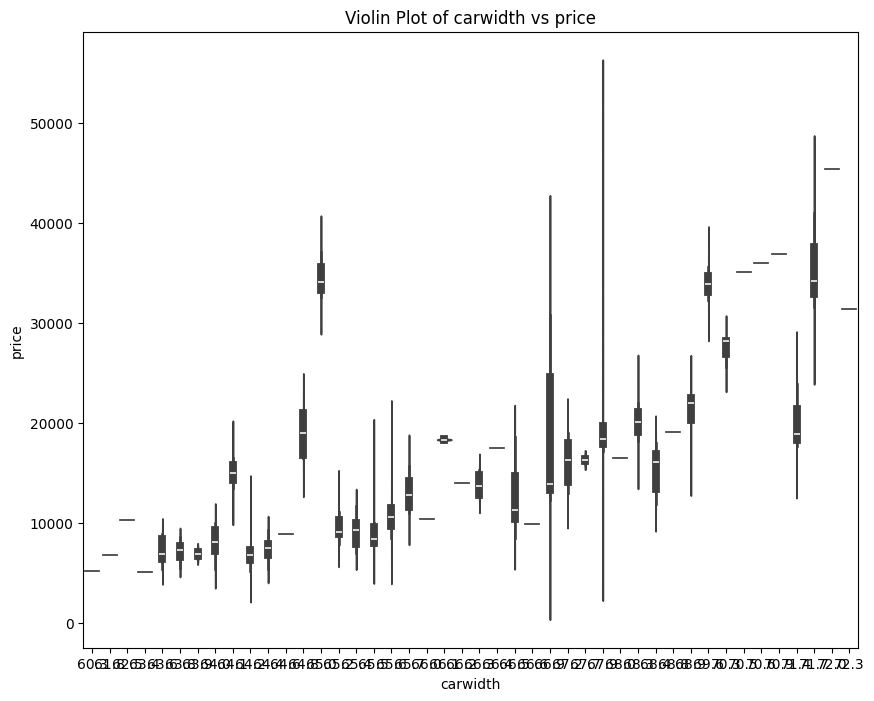

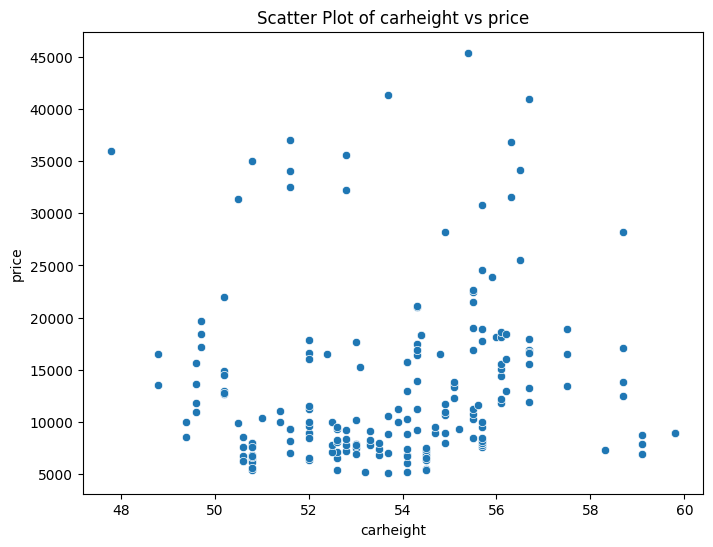

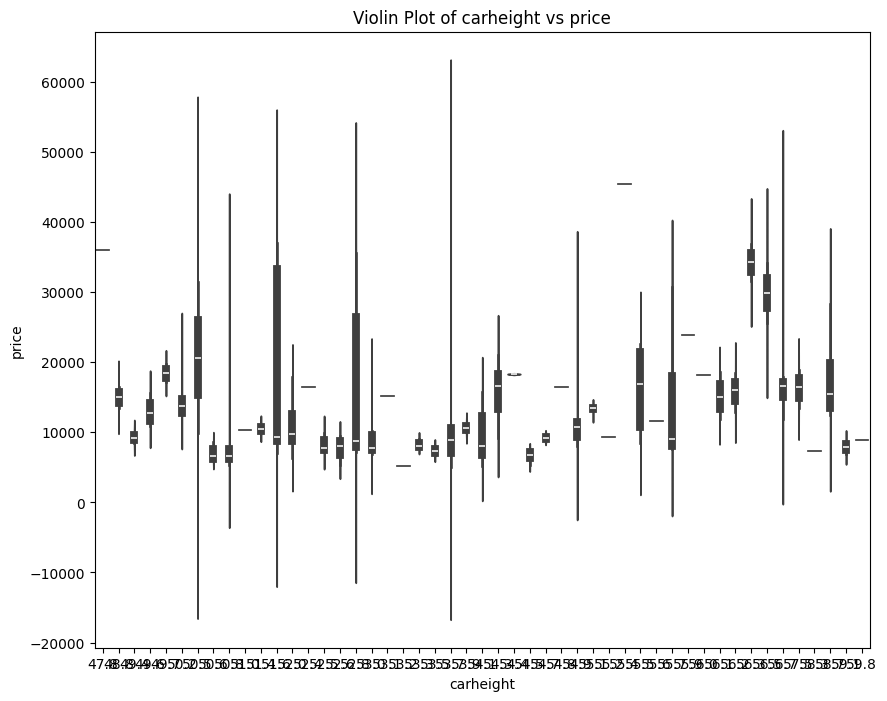

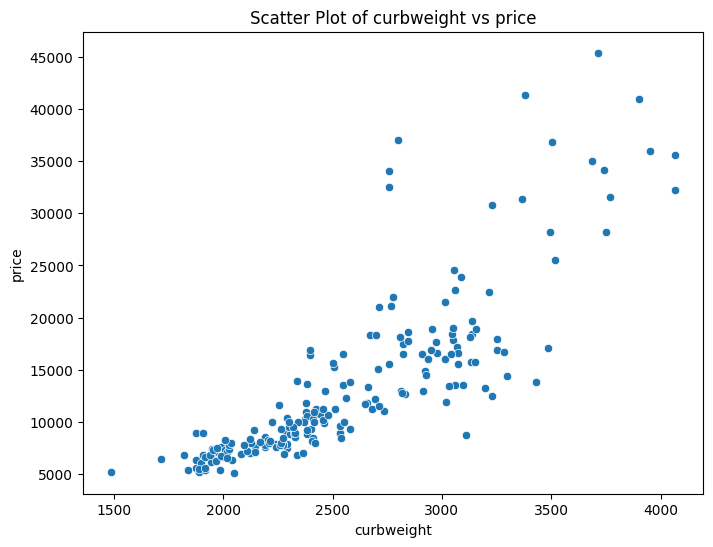

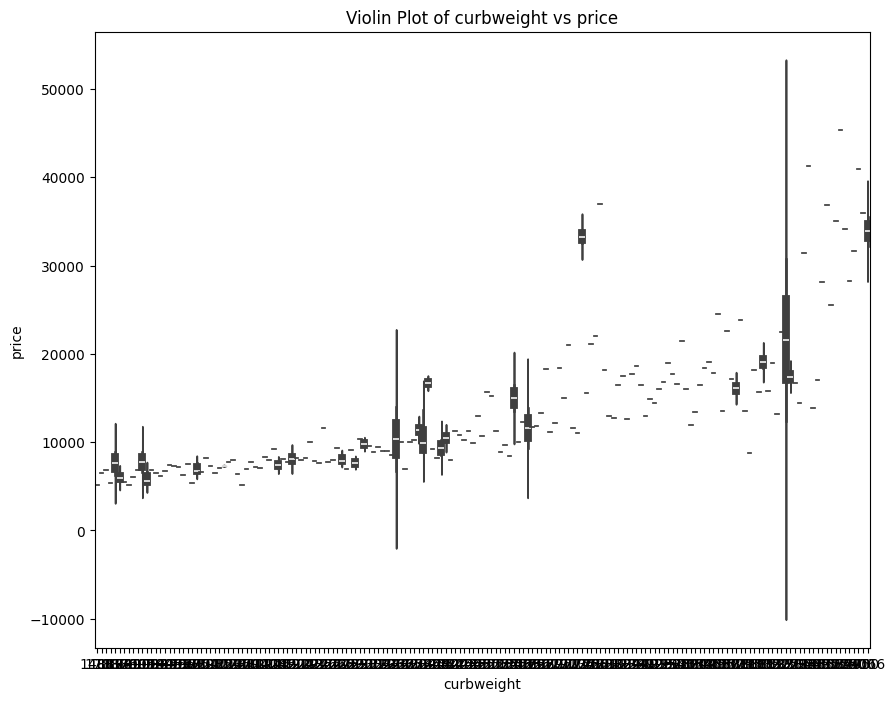

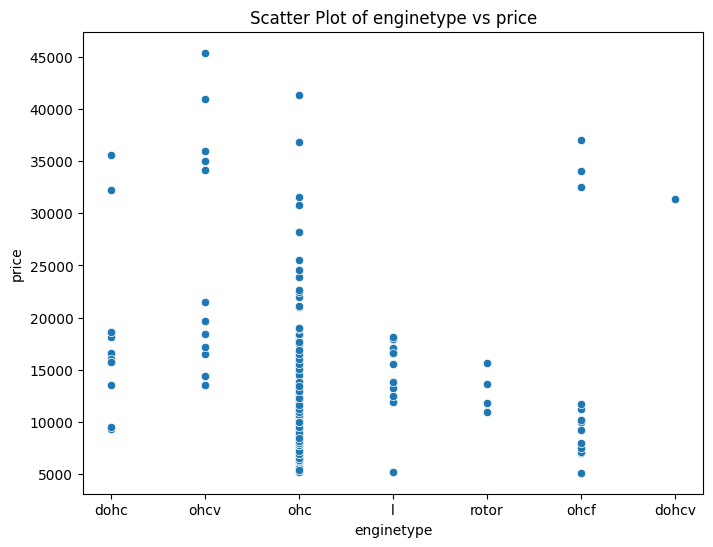

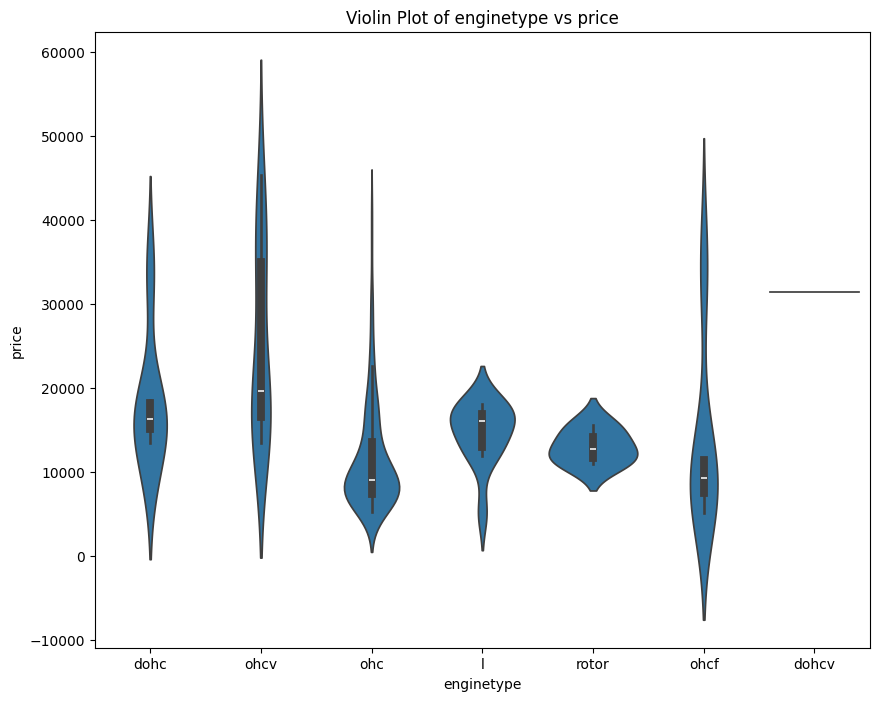

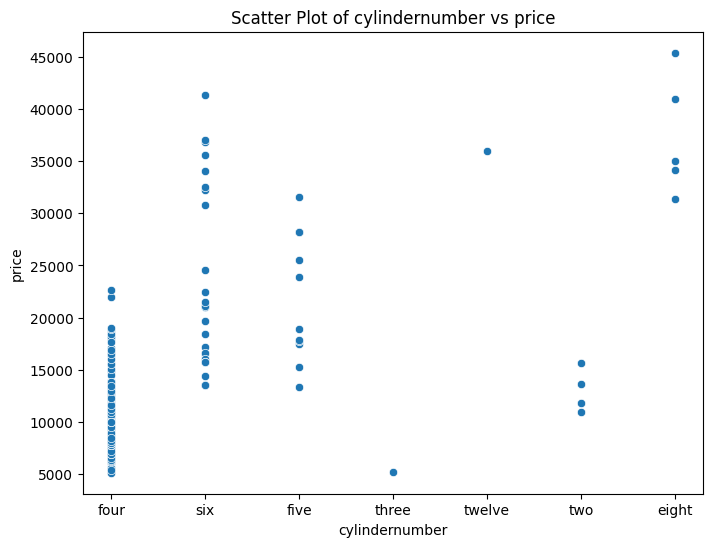

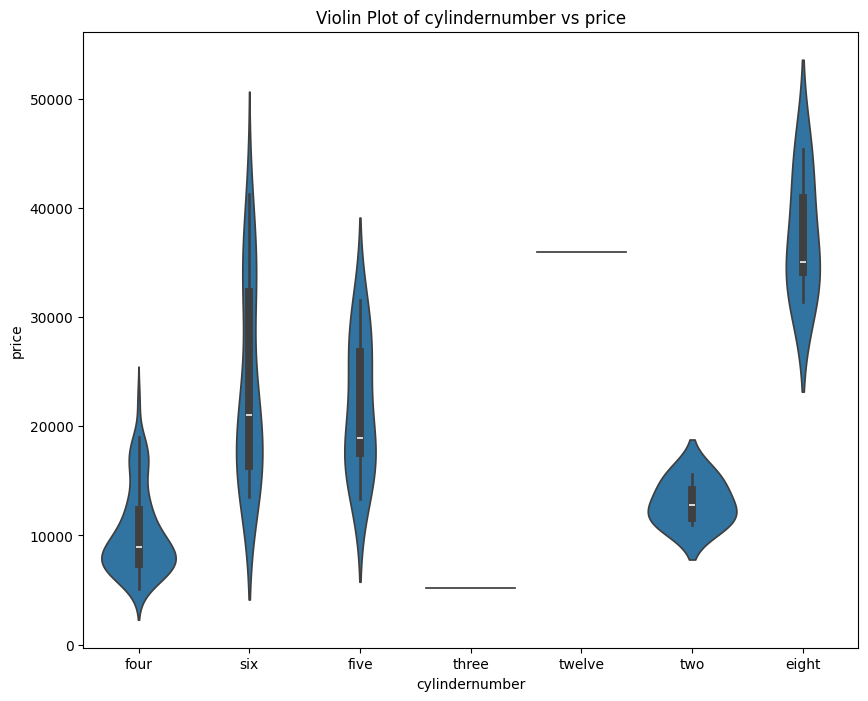

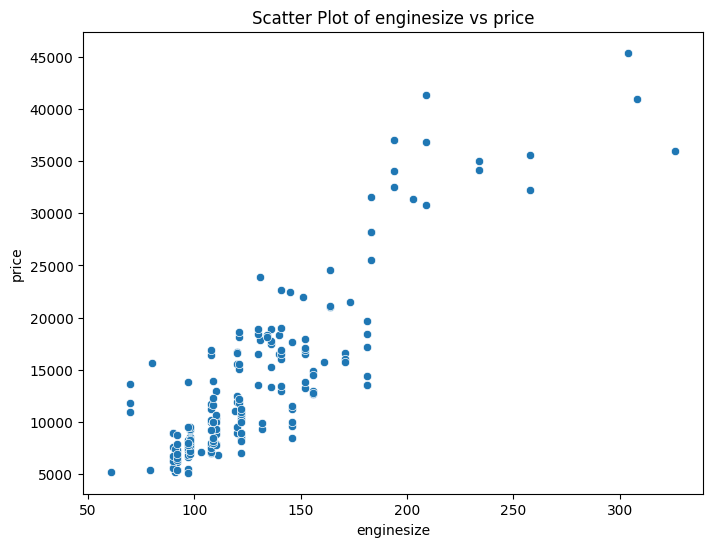

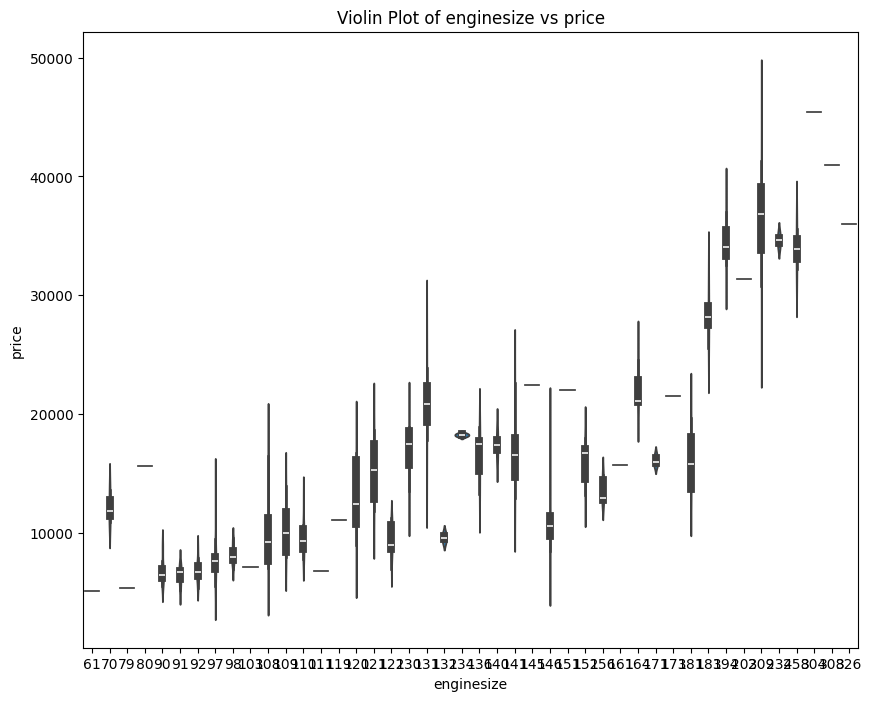

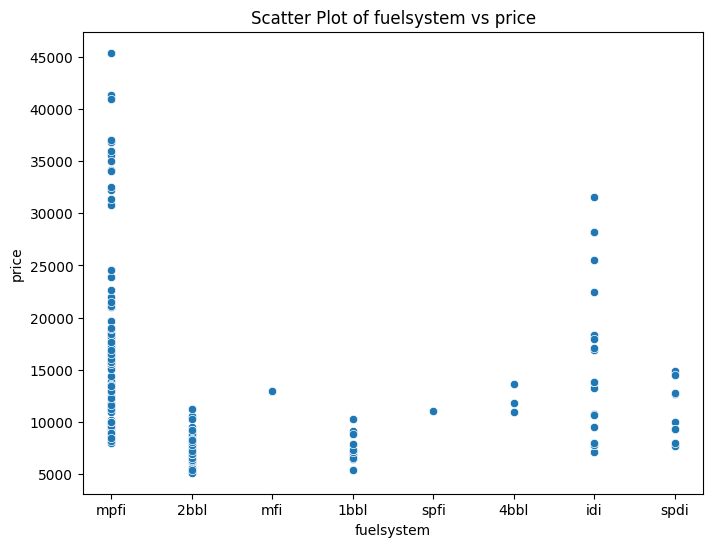

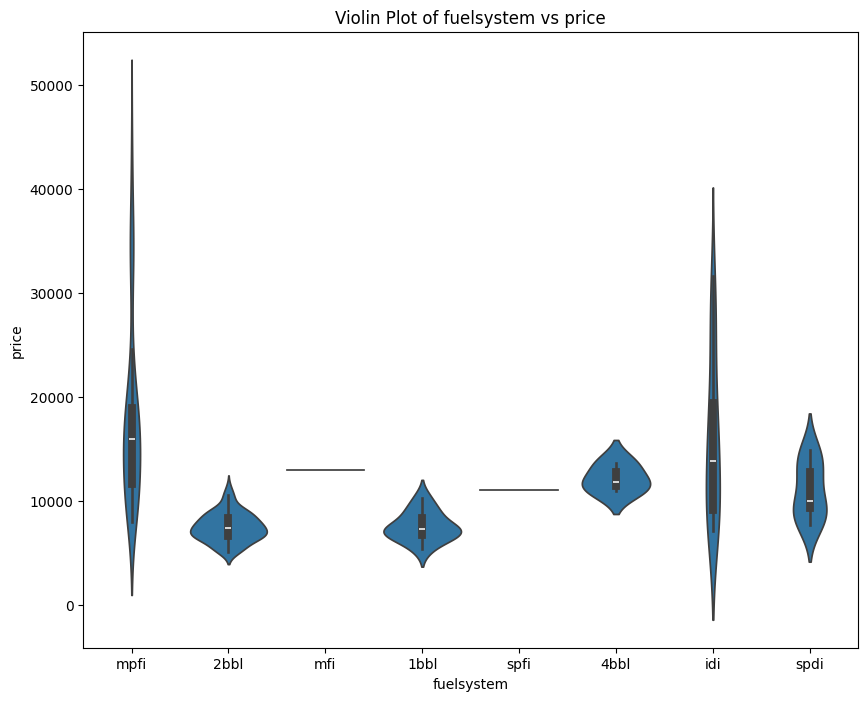

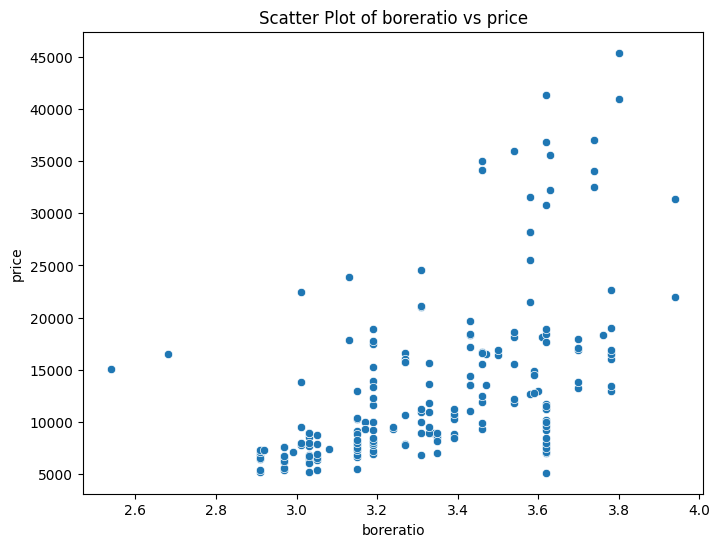

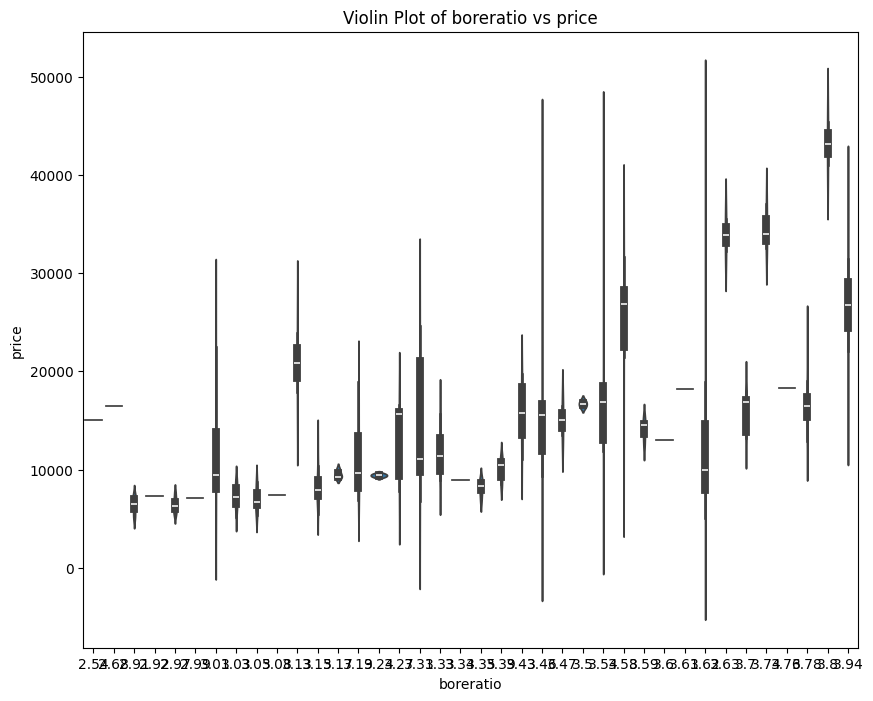

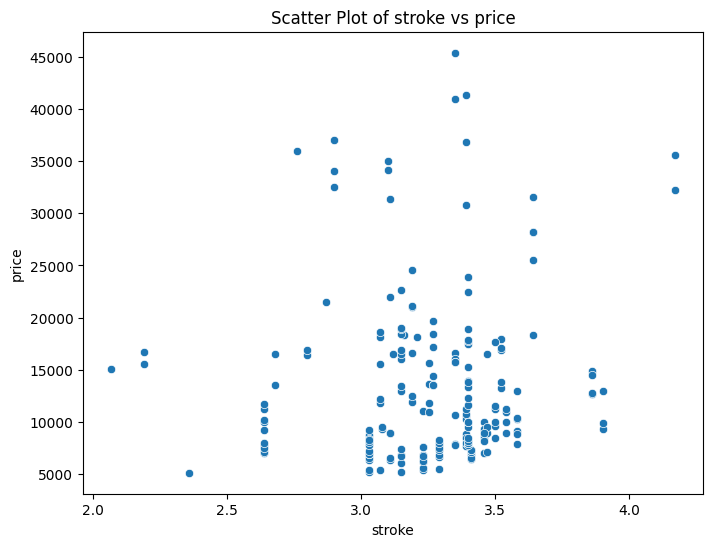

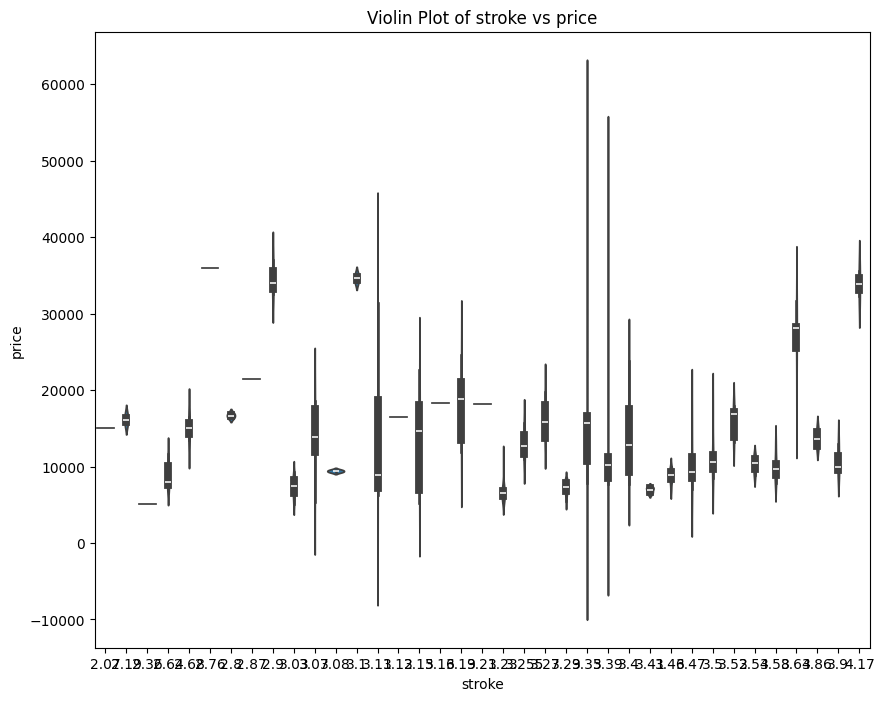

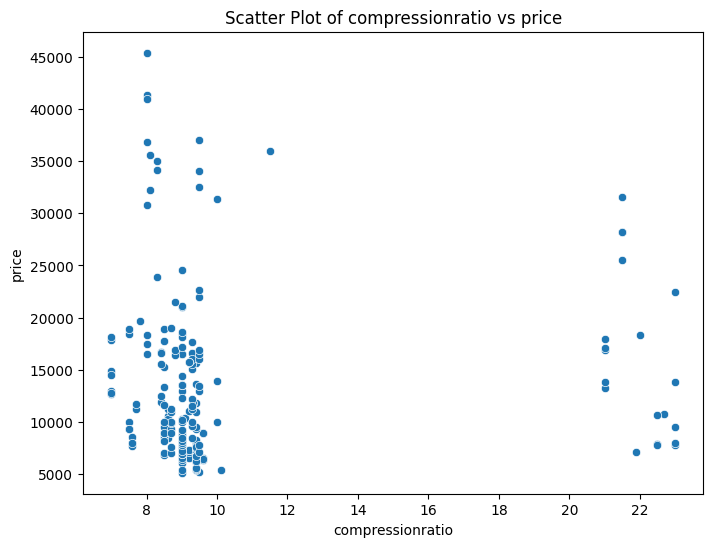

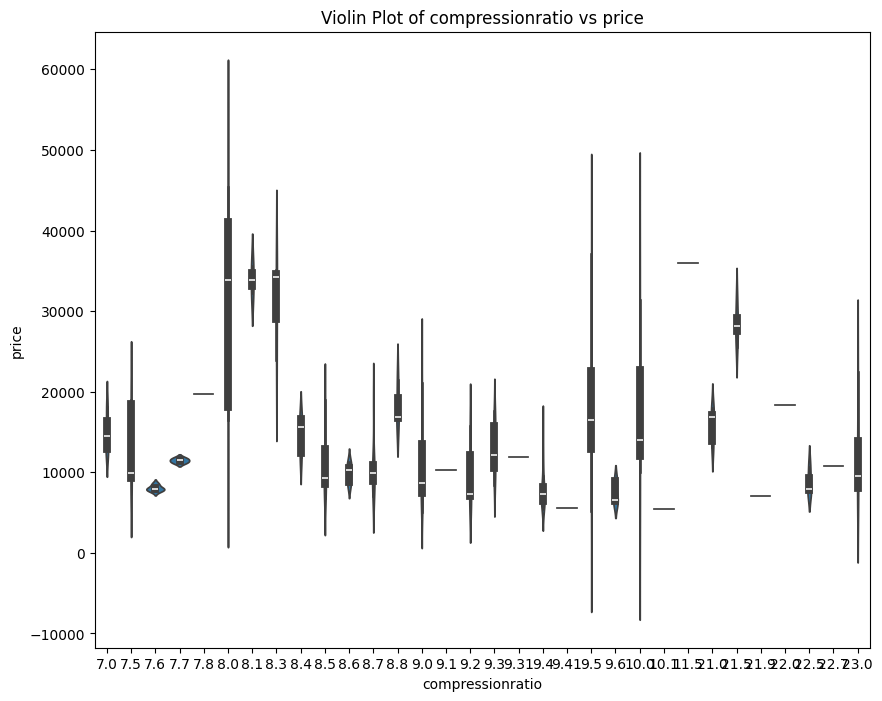

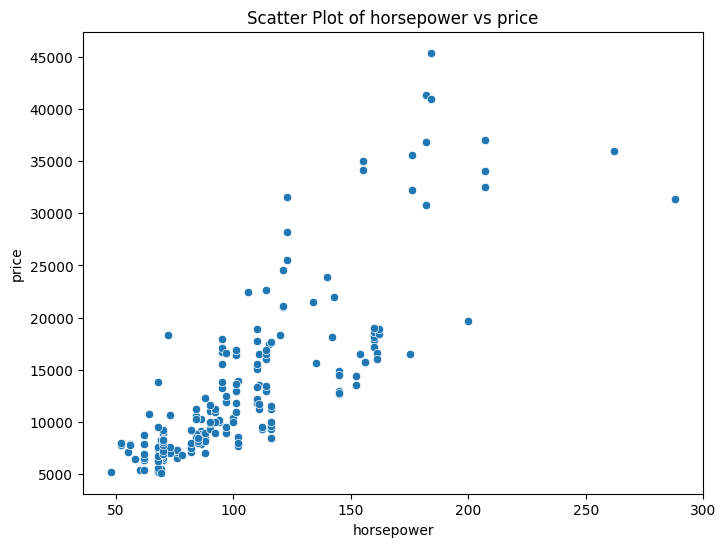

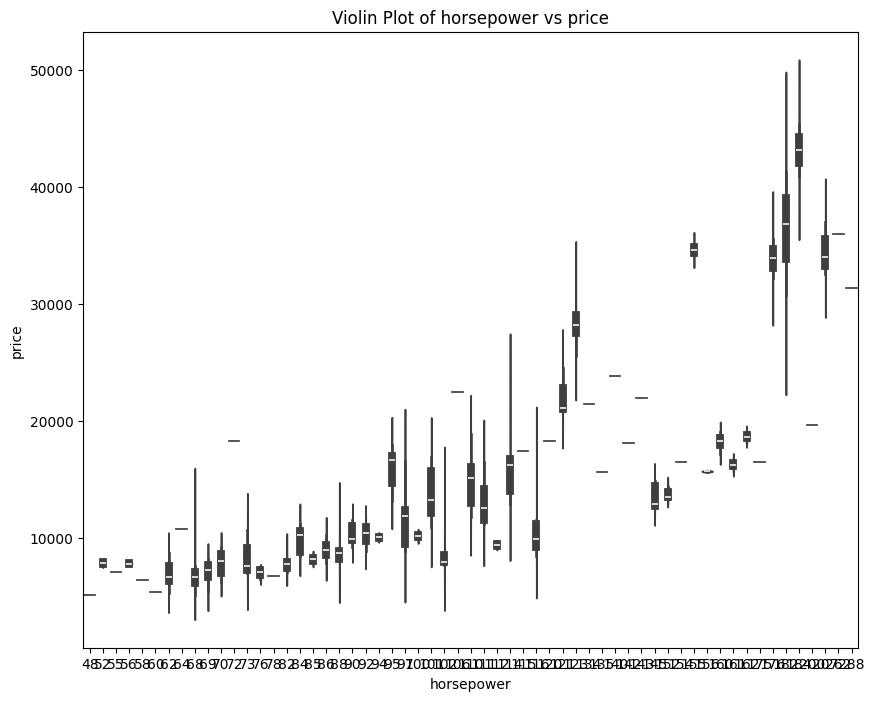

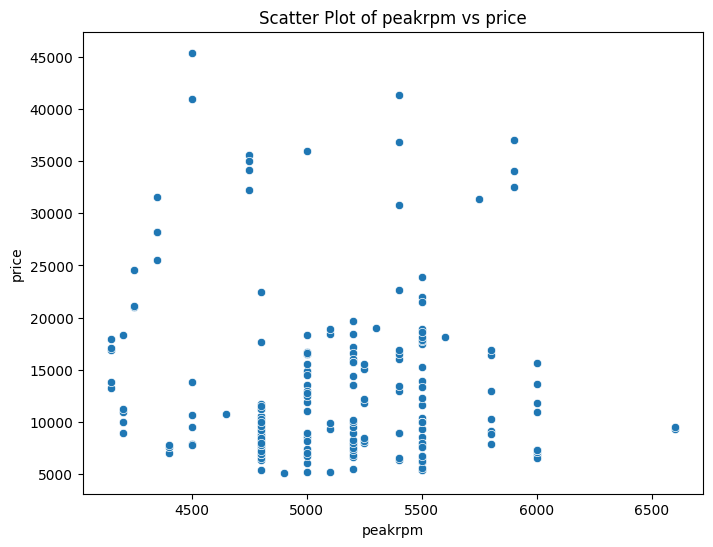

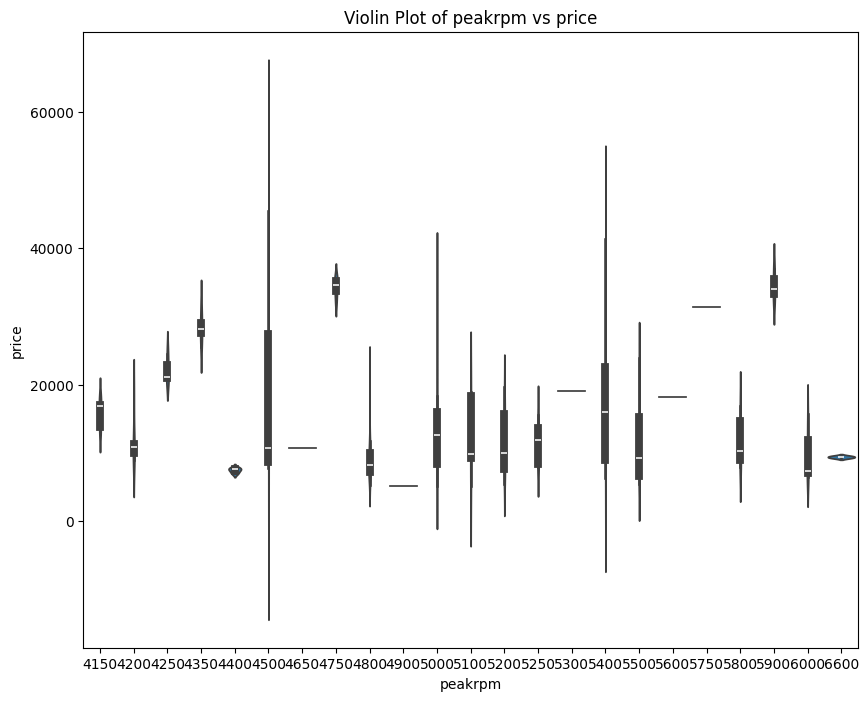

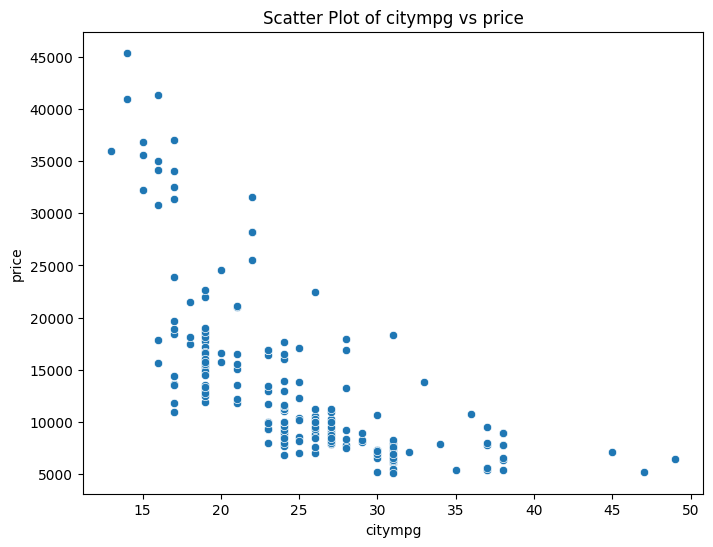

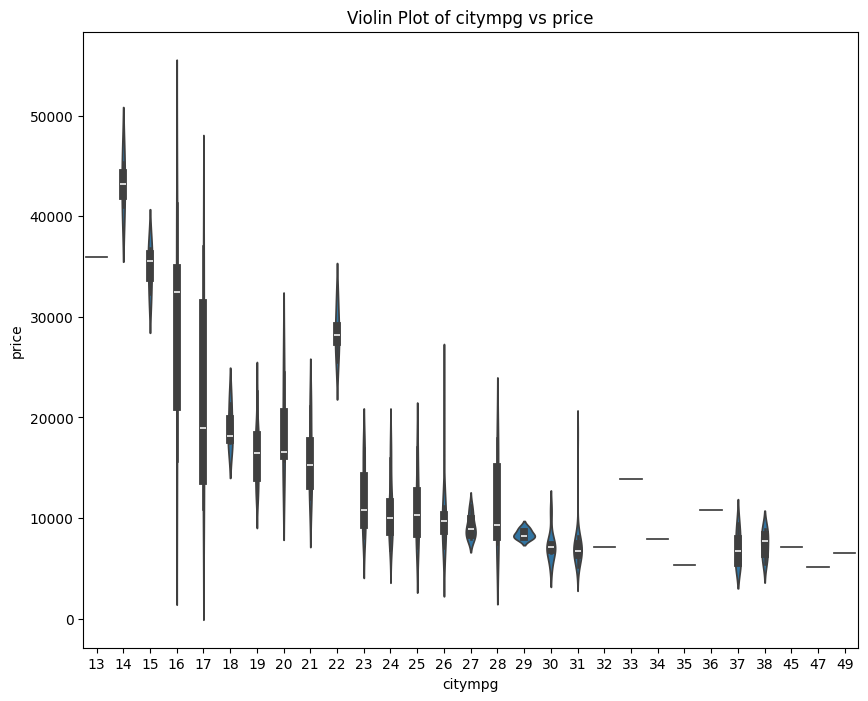

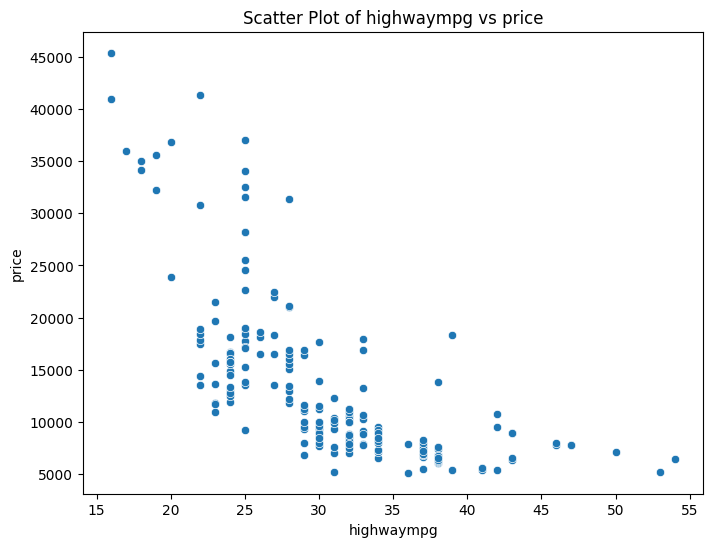

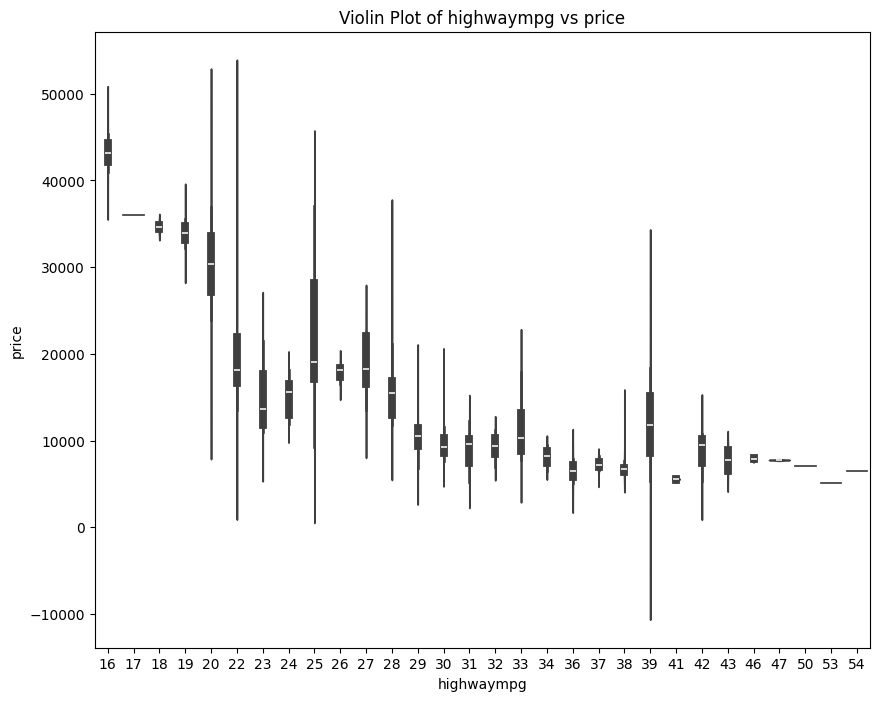

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class ScatterPlot:
    def __init__(self, data):
        self.data = data

    def plot(self, x, y):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=self.data, x=x, y=y)
        plt.title(f"Scatter Plot of {x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

class ViolinPlot:
    def __init__(self, data):
        self.data = data

    def plot(self, x, y):
        plt.figure(figsize=(10, 8))
        sns.violinplot(data=self.data, x=x, y=y)
        plt.title(f"Violin Plot of {x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

# Load the dataset
data = pd.read_csv("/content/CarPrice_Assignment.csv")

# Create instances of ScatterPlot and ViolinPlot
scatter_plot = ScatterPlot(data)
violin_plot = ViolinPlot(data)

# Iterate through each feature and create corresponding plots
for column in data.columns:
    if column != "price":  # Exclude the target variable
        scatter_plot.plot(column, "price")  # Scatter plot with "price" as y-axis
        violin_plot.plot(column, "price")   # Violin plot with "price" as y-axis


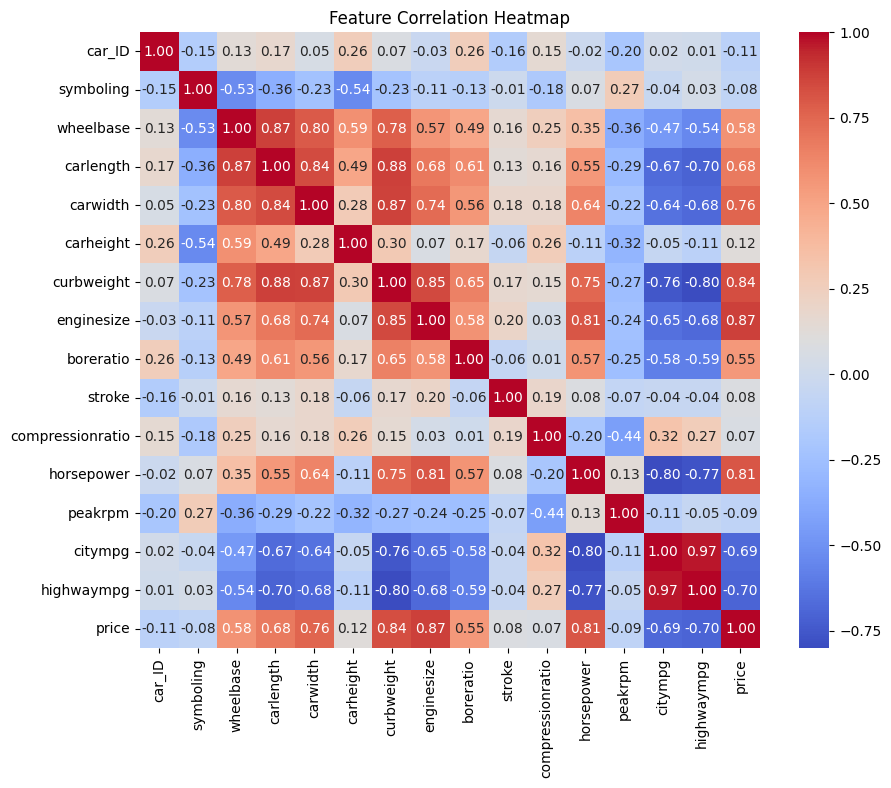

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class FeatureCorrelation:
    def __init__(self, data):
        self.data = data

    def calculate_correlation(self):
        numeric_data = self.data.select_dtypes(include=['number'])  # Select numeric columns only
        plt.figure(figsize=(10, 8))
        correlation_matrix = numeric_data.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Feature Correlation Heatmap")
        plt.show()

# Load the dataset
data = pd.read_csv("/content/CarPrice_Assignment.csv")

# Create an instance of FeatureCorrelation
feature_correlation = FeatureCorrelation(data)

# Calculate and display the correlation between features
feature_correlation.calculate_correlation()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

class ElasticNetRegression:
    def __init__(self, filename):
        self.data = pd.read_csv(filename)

    def preprocess_data(self):
        X = self.data.drop('price', axis=1)
        y = self.data['price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train, alpha=1.0, l1_ratio=0.5):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train, y_train)
        return model

    def evaluate_model(self, model, X_test, y_test):
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        return r2

# Load the dataset
data = pd.read_csv("/content/CarPrice_Assignment.csv")

# Create an instance of ElasticNetRegression
elastic_net_regression = ElasticNetRegression("/content/CarPrice_Assignment.csv")

# Preprocess the data
X_train, X_test, y_train, y_test = elastic_net_regression.preprocess_data()

# Train the ElasticNet model
elastic_net_model = elastic_net_regression.train_model(X_train, y_train)

# Evaluate the model
r2 = elastic_net_regression.evaluate_model(elastic_net_model, X_test, y_test)
print("R2 Score:", r2)


ValueError: could not convert string to float: 'mazda rx-7 gs'

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

class ElasticNetRegression:
    def __init__(self, filename):
        self.data = pd.read_csv(filename)

    def preprocess_data(self):
        # Exclude non-numeric columns from the feature set
        numeric_data = self.data.select_dtypes(include=['number'])
        X = numeric_data.drop('price', axis=1)
        y = numeric_data['price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train, alpha=1.0, l1_ratio=0.5):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train, y_train)
        return model

    def evaluate_model(self, model, X_test, y_test):
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        return r2

# Load the dataset
data = pd.read_csv("/content/CarPrice_Assignment.csv")

# Create an instance of ElasticNetRegression
elastic_net_regression = ElasticNetRegression("/content/CarPrice_Assignment.csv")

# Preprocess the data
X_train, X_test, y_train, y_test = elastic_net_regression.preprocess_data()

# Train the ElasticNet model
elastic_net_model = elastic_net_regression.train_model(X_train, y_train)

# Evaluate the model
r2 = elastic_net_regression.evaluate_model(elastic_net_model, X_test, y_test)
print("R2 Score:", r2)


R2 Score: 0.8494298557571865


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

class RandomForestRegression:
    def __init__(self, filename):
        self.data = pd.read_csv(filename)

    def preprocess_data(self):
        # Exclude non-numeric columns from the feature set
        numeric_data = self.data.select_dtypes(include=['number'])
        X = numeric_data.drop('price', axis=1)
        y = numeric_data['price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train, n_estimators=100, max_depth=None, random_state=42):
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
        model.fit(X_train, y_train)
        return model

    def evaluate_model(self, model, X_test, y_test):
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        return r2

# Load the dataset
data = pd.read_csv("/content/CarPrice_Assignment.csv")

# Create an instance of RandomForestRegression
random_forest_regression = RandomForestRegression("/content/CarPrice_Assignment.csv")

# Preprocess the data
X_train, X_test, y_train, y_test = random_forest_regression.preprocess_data()

# Train the Random Forest model
random_forest_model = random_forest_regression.train_model(X_train, y_train)

# Evaluate the model
r2 = random_forest_regression.evaluate_model(random_forest_model, X_test, y_test)
print("R2 Score (Random Forest):", r2)


R2 Score (Random Forest): 0.9583626051646884


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

class NeuralNetworkRegression:
    def __init__(self, filename):
        self.data = pd.read_csv(filename)

    def preprocess_data(self):
        # Exclude non-numeric columns from the feature set
        numeric_data = self.data.select_dtypes(include=['number'])
        X = numeric_data.drop('price', axis=1)
        y = numeric_data['price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train, hidden_layer_sizes=(100), activation='tanh', solver='lbfgs', random_state=42):
        model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, random_state=random_state)
        model.fit(X_train, y_train)
        return model

    def evaluate_model(self, model, X_test, y_test):
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        return r2

# Load the dataset
data = pd.read_csv("/content/CarPrice_Assignment.csv")

# Create an instance of NeuralNetworkRegression
neural_network_regression = NeuralNetworkRegression("/content/CarPrice_Assignment.csv")

# Preprocess the data
X_train, X_test, y_train, y_test = neural_network_regression.preprocess_data()

# Train the Neural Network model
neural_network_model = neural_network_regression.train_model(X_train, y_train)

# Evaluate the model
r2 = neural_network_regression.evaluate_model(neural_network_model, X_test, y_test)
print("R2 Score (Neural Network):", r2)


R2 Score (Neural Network): 0.7732125947447653


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

class AdaBoostRegression:
    def __init__(self, filename):
        self.data = pd.read_csv(filename)

    def preprocess_data(self):
        # Exclude non-numeric columns from the feature set
        numeric_data = self.data.select_dtypes(include=['number'])
        X = numeric_data.drop('price', axis=1)
        y = numeric_data['price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train, n_estimators=50, learning_rate=1.0, random_state=42):
        model = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
        model.fit(X_train, y_train)
        return model

    def evaluate_model(self, model, X_test, y_test):
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        return r2

# Load the dataset
data = pd.read_csv("/content/CarPrice_Assignment.csv")

# Create an instance of AdaBoostRegression
adaboost_regression = AdaBoostRegression("/content/CarPrice_Assignment.csv")

# Preprocess the data
X_train, X_test, y_train, y_test = adaboost_regression.preprocess_data()

# Train the AdaBoost model
adaboost_model = adaboost_regression.train_model(X_train, y_train)

# Evaluate the model
r2 = adaboost_regression.evaluate_model(adaboost_model, X_test, y_test)
print("R2 Score (AdaBoost):", r2)


R2 Score (AdaBoost): 0.9202712606961427


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

class RegressionModelsComparison:
    def __init__(self, filename):
        self.data = pd.read_csv(filename)

    def preprocess_data(self):
        # Exclude non-numeric columns from the feature set
        numeric_data = self.data.select_dtypes(include=['number'])
        X = numeric_data.drop('price', axis=1)
        y = numeric_data['price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test

    def evaluate_model(self, model, X_test, y_test):
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        return r2

# Load the dataset
data = pd.read_csv("/content/CarPrice_Assignment.csv")

# Create an instance of RegressionModelsComparison
models_comparison = RegressionModelsComparison("/content/CarPrice_Assignment.csv")

# Preprocess the data
X_train, X_test, y_train, y_test = models_comparison.preprocess_data()

# Train and evaluate ElasticNet regression
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_train, y_train)
elastic_net_r2 = models_comparison.evaluate_model(elastic_net_model, X_test, y_test)

# Train and evaluate Random Forest regression
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_r2 = models_comparison.evaluate_model(random_forest_model, X_test, y_test)

# Train and evaluate Neural Network regression
neural_network_model = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='lbfgs', random_state=42)
neural_network_model.fit(X_train, y_train)
neural_network_r2 = models_comparison.evaluate_model(neural_network_model, X_test, y_test)

# Train and evaluate AdaBoost regression
adaboost_model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_r2 = models_comparison.evaluate_model(adaboost_model, X_test, y_test)

# Compare R2 scores of all models
print("R2 Score (ElasticNet):", elastic_net_r2)
print("R2 Score (Random Forest):", random_forest_r2)
print("R2 Score (Neural Network):", neural_network_r2)
print("R2 Score (AdaBoost):", adaboost_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


R2 Score (ElasticNet): 0.8494298557571865
R2 Score (Random Forest): 0.9583626051646884
R2 Score (Neural Network): 0.7732125947447653
R2 Score (AdaBoost): 0.9202712606961427
